In [4]:
import pandas as pd
from pathlib import Path

import math

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/afs/desy.de/user/a/axelheim/private/run_BaumBauenNotebooks')



from tb_to_csv import tabulate_metrics
from plot_fcts import curve_plot, multi_metric_bar_plot, curve_plot_accuracies

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [5]:
data_names = ["wSim_wReco_BsHc_15000_events" ,
"wSim_wReco_XHc_15000_events" ,
"wSim_wReco_BsX_15000_events" , 
"wSim_wReco_BsXHc_15000_events"  ]
#["noSim_noReco_BsHc_15000_events" ,
#"noSim_noReco_XHc_15000_events" ,
#"noSim_noReco_BsX_15000_events" , 
#"noSim_noReco_BsXHc_15000_events"  ]
#     BsHc  XHc   BsX   BsXHc

specs = ["512_0.001_128_0.3_8","1024_0.001_128_0.3_8"]



 now processing: /nfs/dust/belle2/user/axelheim/MC_studies/my6modes/tb_logs/wSim_wReco_BsHc_15000_events/512_0.001_128_0.3_8
Converting run events.out.tfevents.1627669870.batchg010.desy.de.112908.0

- Done
len(tb_metrics[i]): 151
most_epochs_idx: 0
len(tb_metrics): 1
type(acc_X): <class 'pandas.core.series.Series'>

 now processing: /nfs/dust/belle2/user/axelheim/MC_studies/my6modes/tb_logs/wSim_wReco_BsHc_15000_events/1024_0.001_128_0.3_8
Converting run events.out.tfevents.1627762161.batchg011.desy.de.116527.0

- Done
len(tb_metrics[i]): 68
most_epochs_idx: 0
len(tb_metrics): 1
type(acc_X): <class 'pandas.core.series.Series'>

 now processing: /nfs/dust/belle2/user/axelheim/MC_studies/my6modes/tb_logs/wSim_wReco_XHc_15000_events/512_0.001_128_0.3_8
Converting run events.out.tfevents.1627669855.batchg012.desy.de.96925.0

- Done
Converting run events.out.tfevents.1627646215.naf-belle-gpu01.desy.de.194645.0

Run events.out.tfevents.1627646215.naf-belle-gpu01.desy.de.194645.0 is empty, d

/afs/desy.de/user/a/axelheim/private/run_BaumBauenNotebooks/plot_fcts.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,5))


type(acc_X): <class 'pandas.core.series.Series'>

 now processing: /nfs/dust/belle2/user/axelheim/MC_studies/my6modes/tb_logs/wSim_wReco_BsXHc_15000_events/1024_0.001_128_0.3_8
Converting run events.out.tfevents.1627641640.naf-belle-gpu01.desy.de.186715.0

Run events.out.tfevents.1627641640.naf-belle-gpu01.desy.de.186715.0 is empty, didn't process it 

Converting run events.out.tfevents.1627626316.batchg012.desy.de.60154.0

Run events.out.tfevents.1627626316.batchg012.desy.de.60154.0 is empty, didn't process it 

Converting run events.out.tfevents.1627809373.batchg012.desy.de.70336.0

- Done
Converting run events.out.tfevents.1627625859.naf-belle-gpu01.desy.de.156409.0

Run events.out.tfevents.1627625859.naf-belle-gpu01.desy.de.156409.0 is empty, didn't process it 

Converting run events.out.tfevents.1627903547.batchg012.desy.de.178597.0

- Done
len(tb_metrics[i]): 51
len(tb_metrics[i]): 85
most_epochs_idx: 1
len(tb_metrics): 2
type(acc_X): <class 'pandas.core.series.Series'>


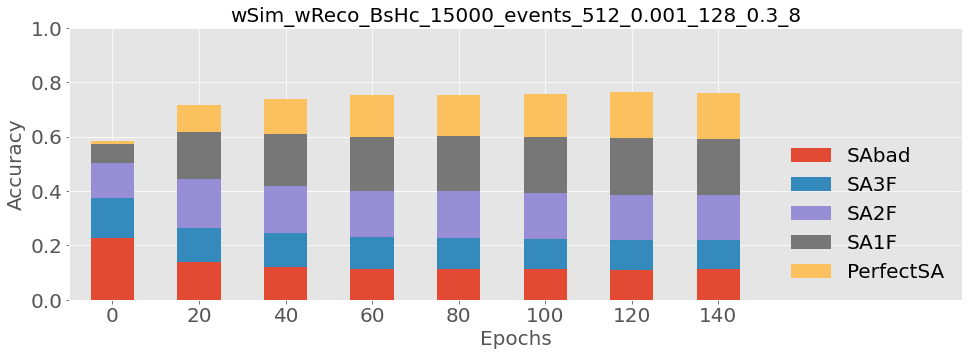

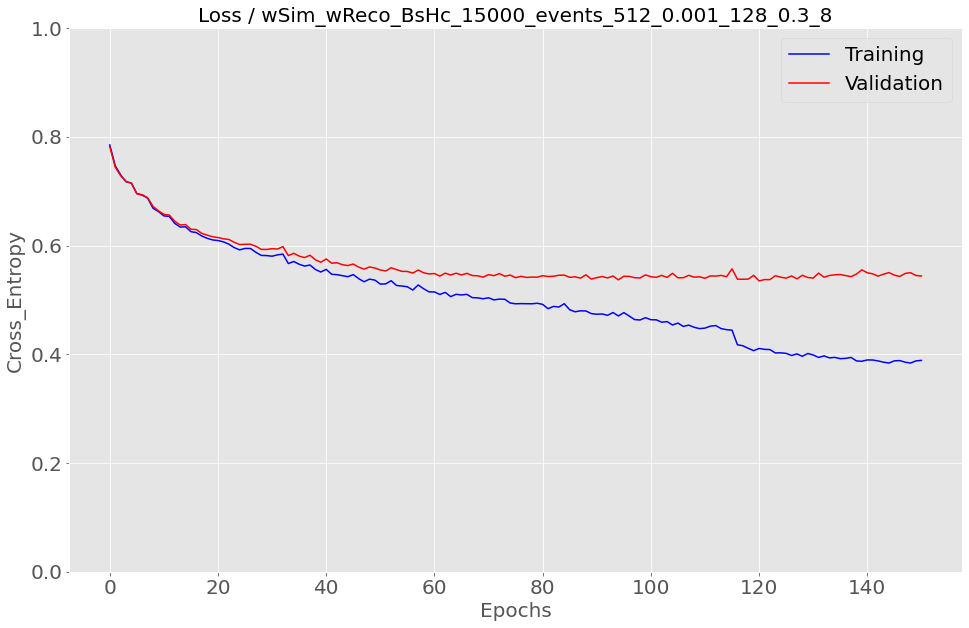

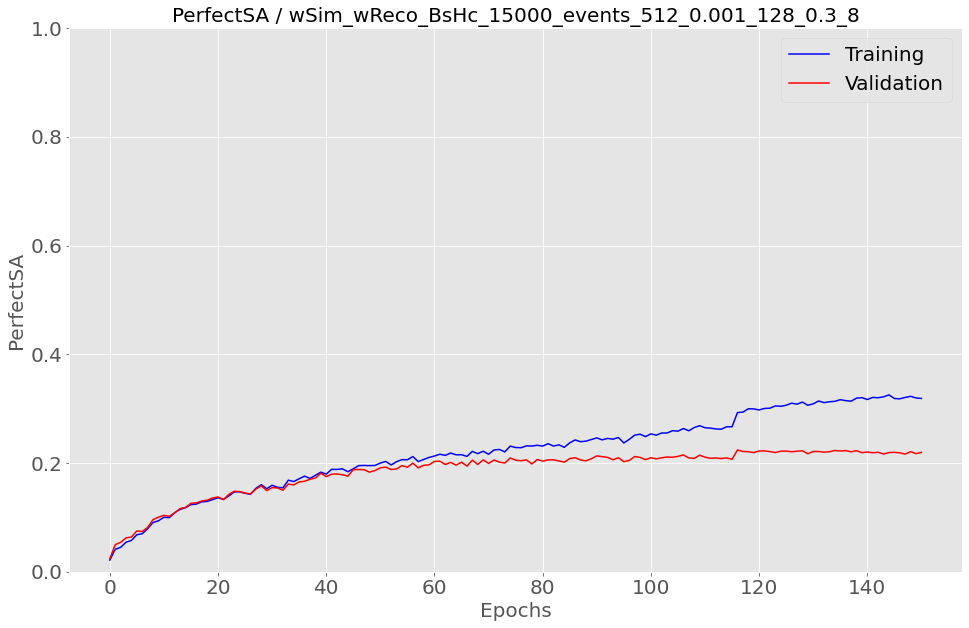

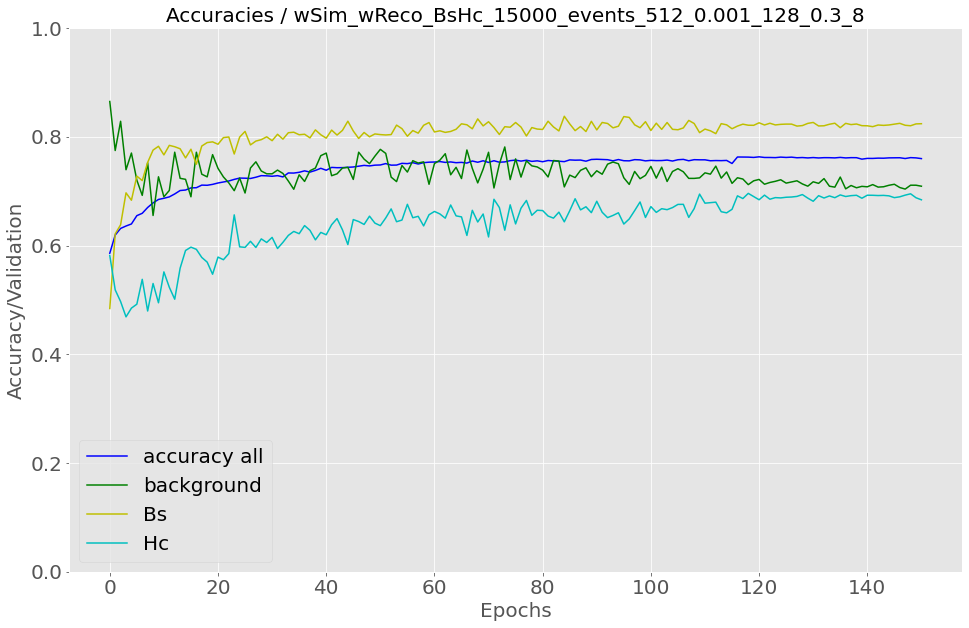

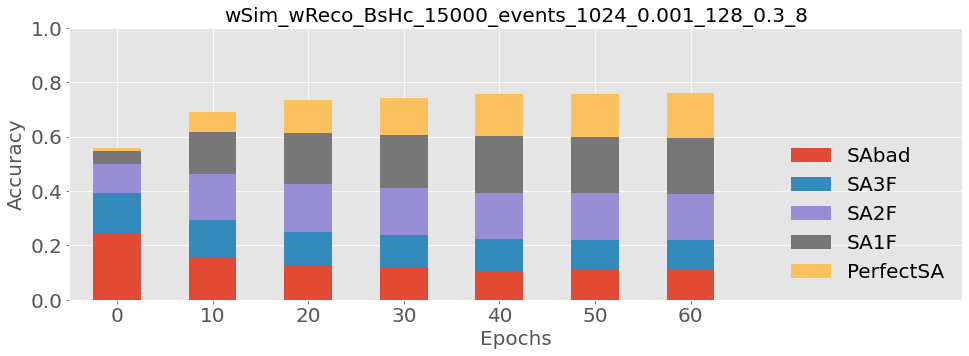

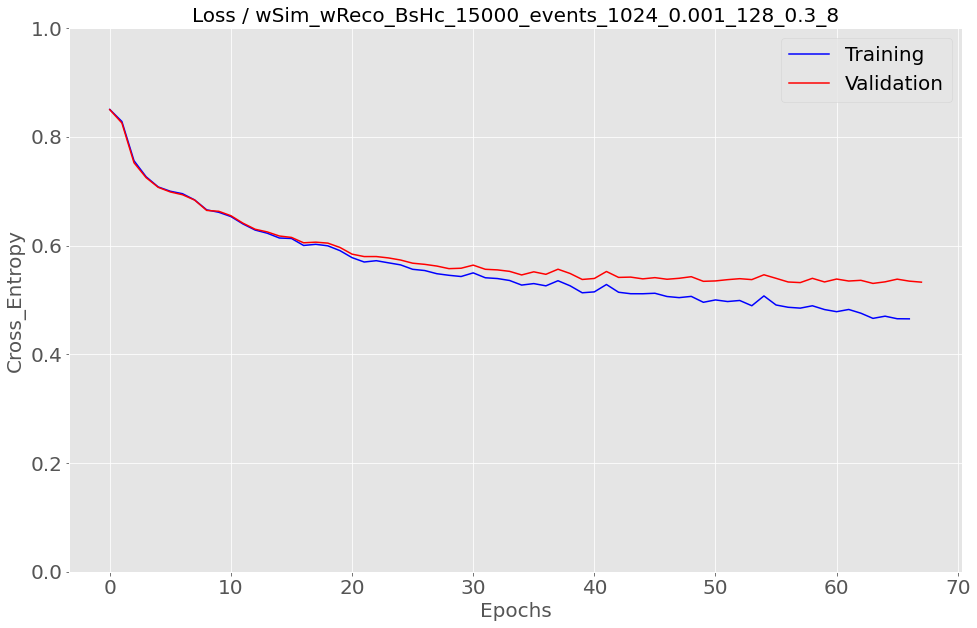

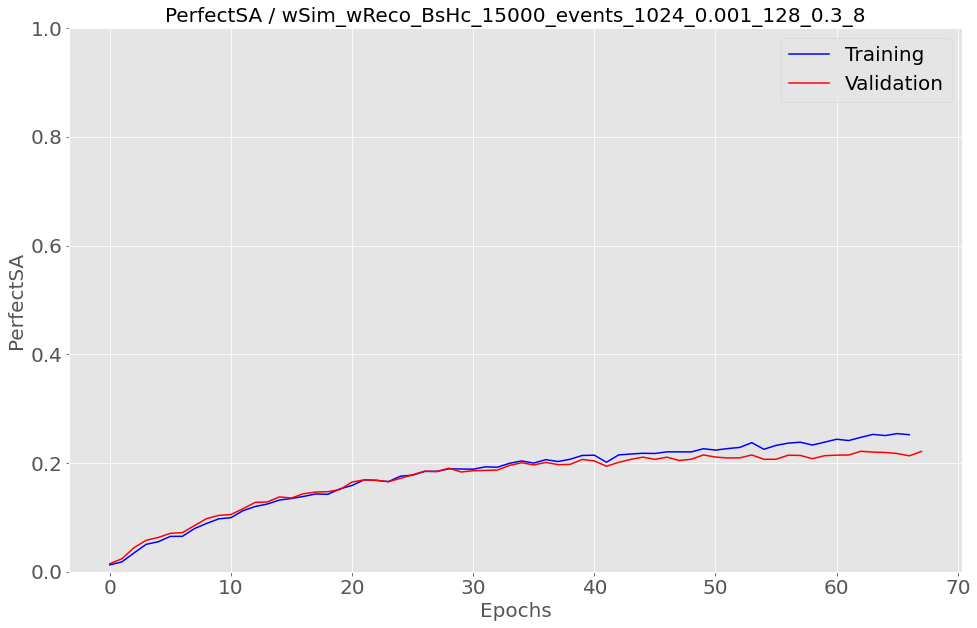

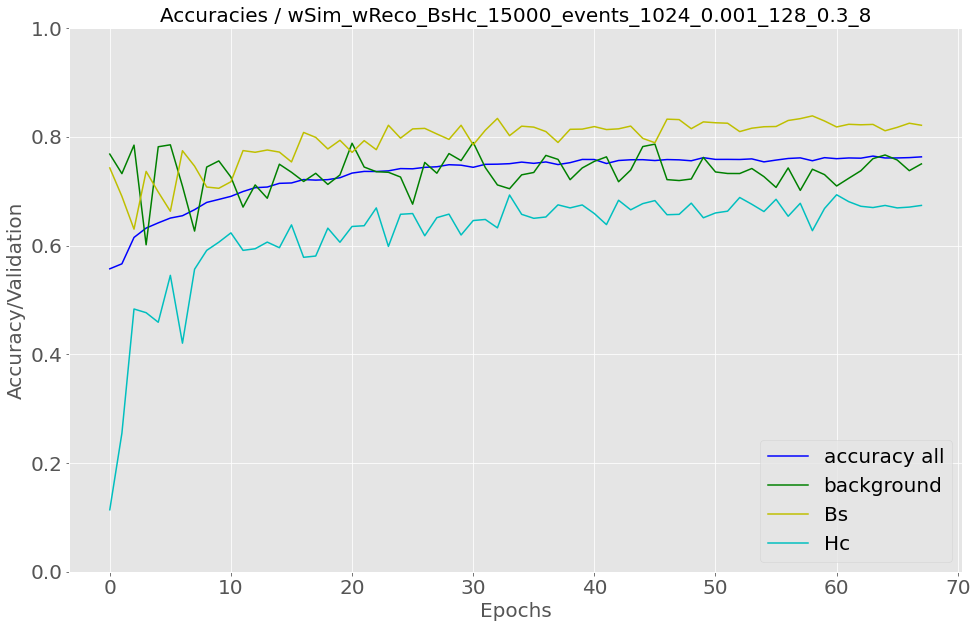

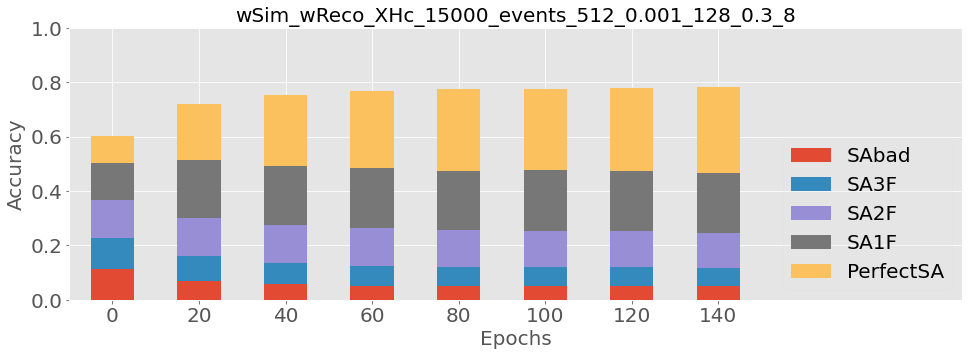

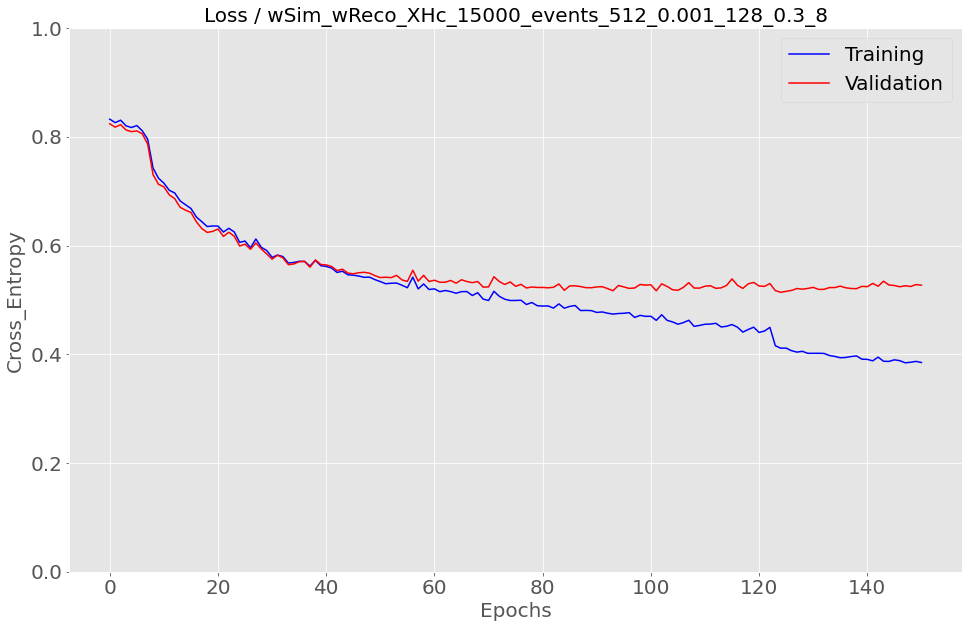

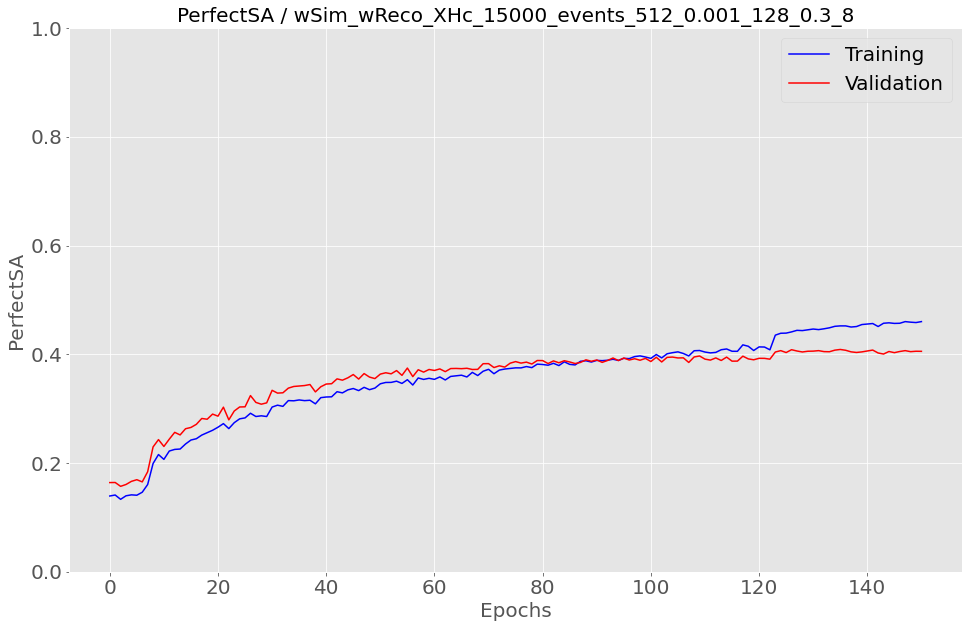

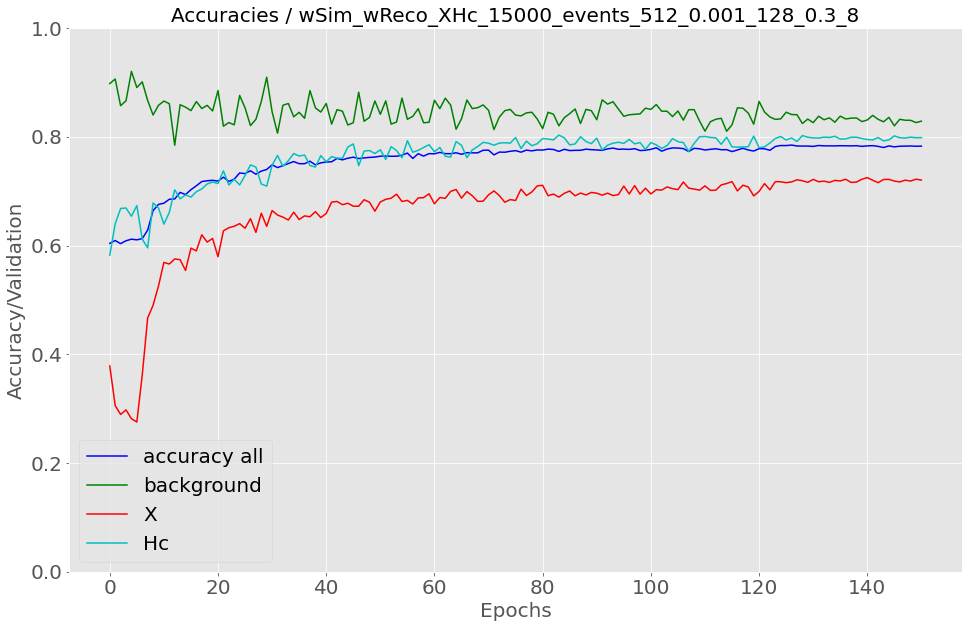

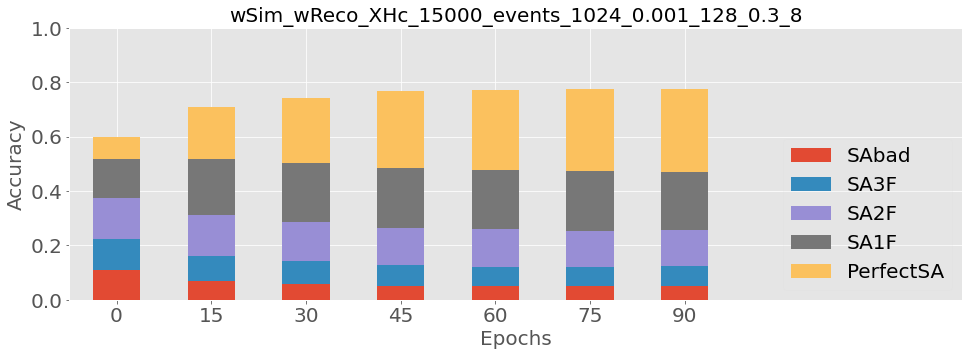

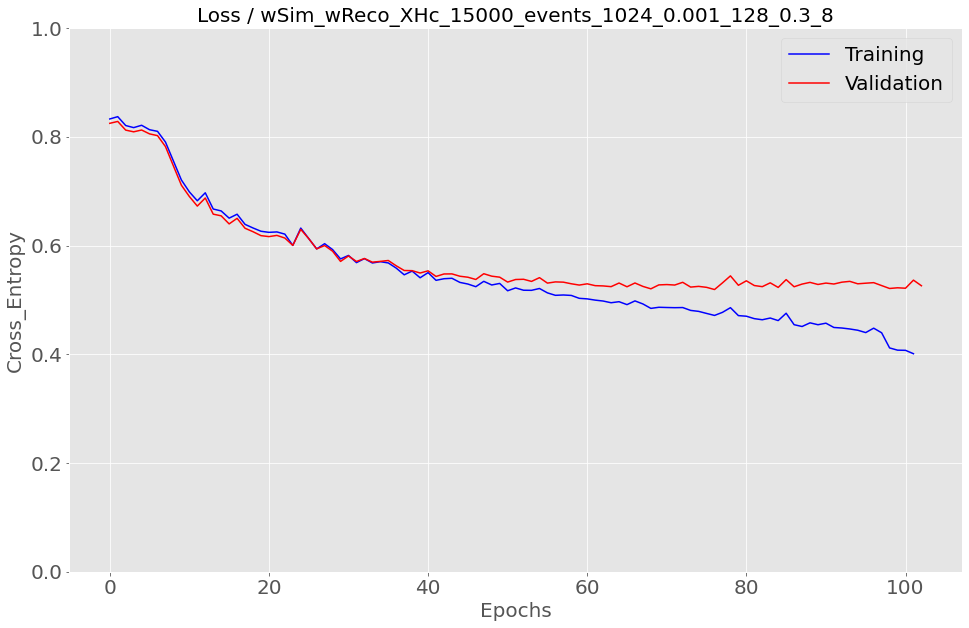

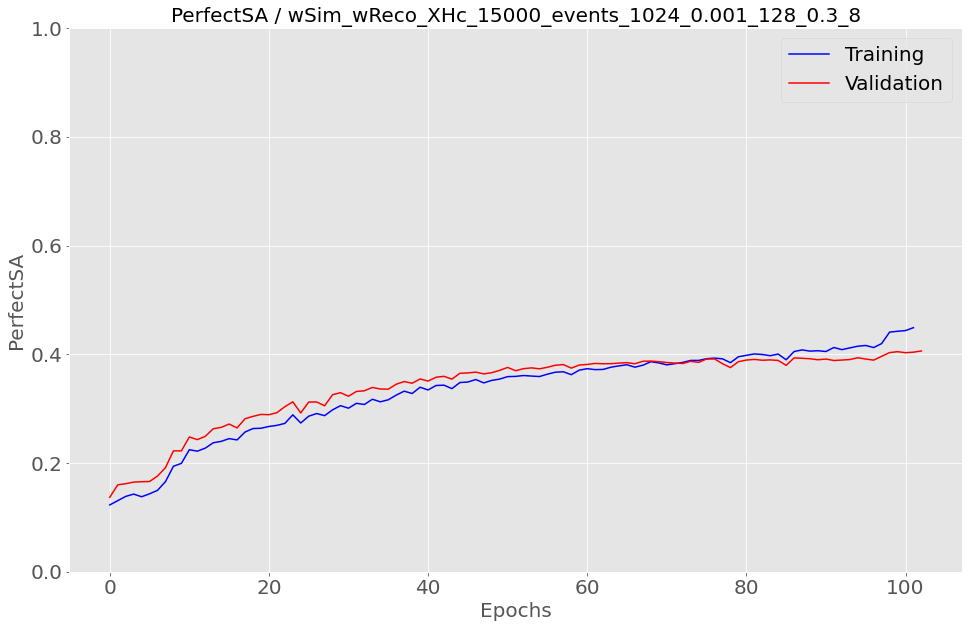

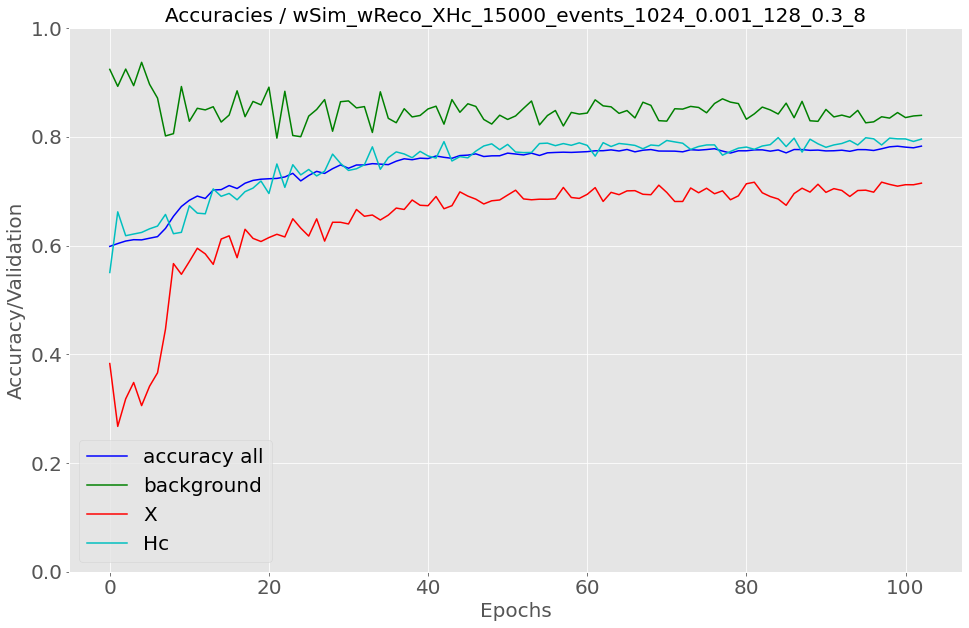

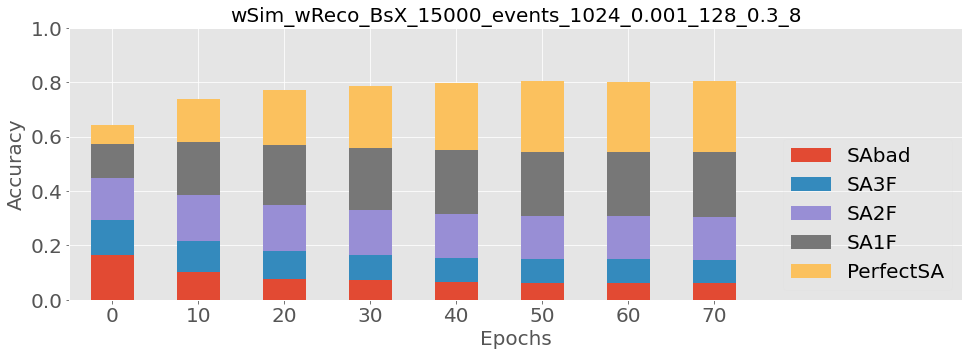

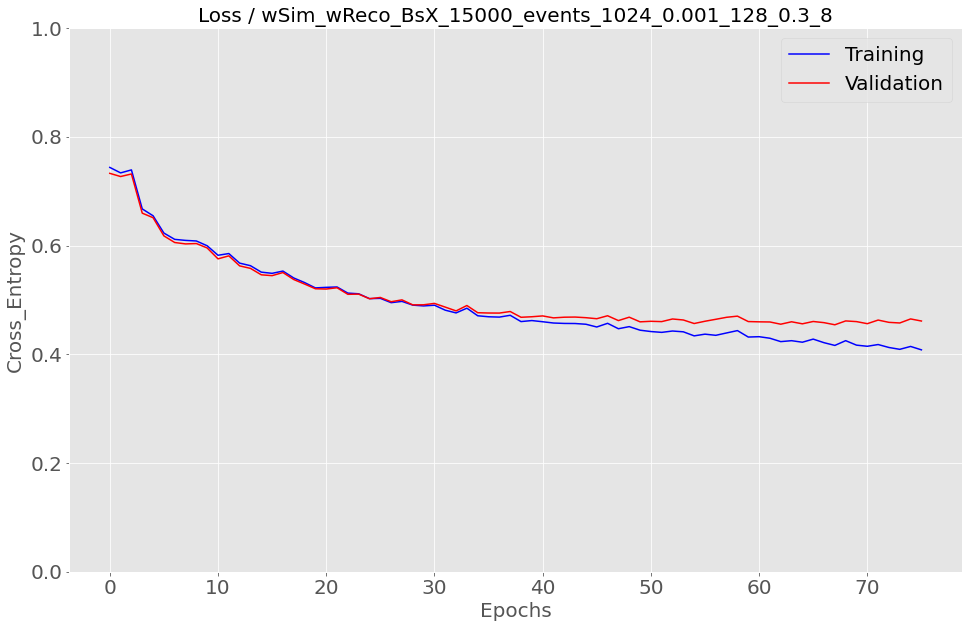

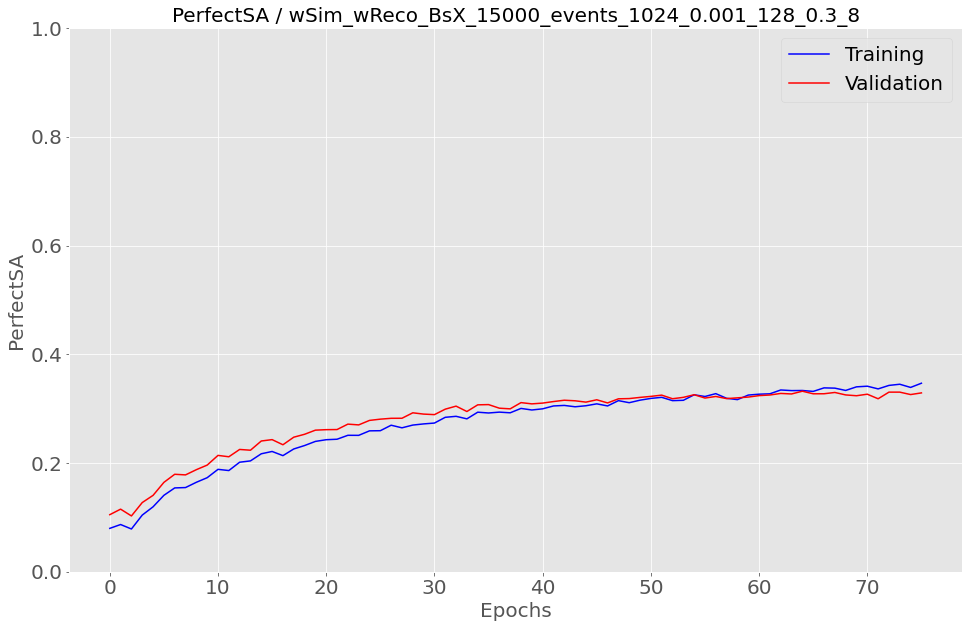

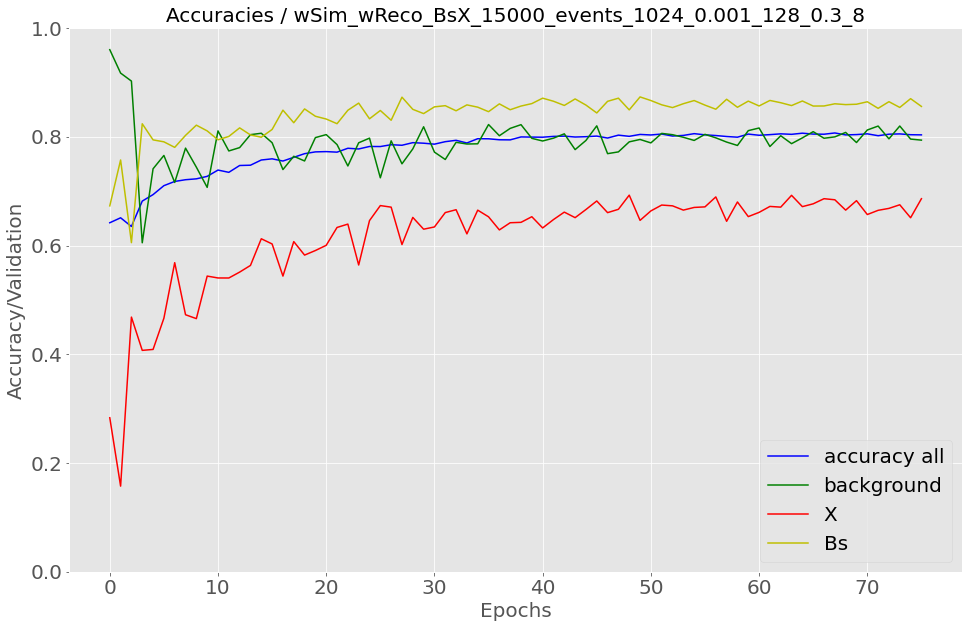

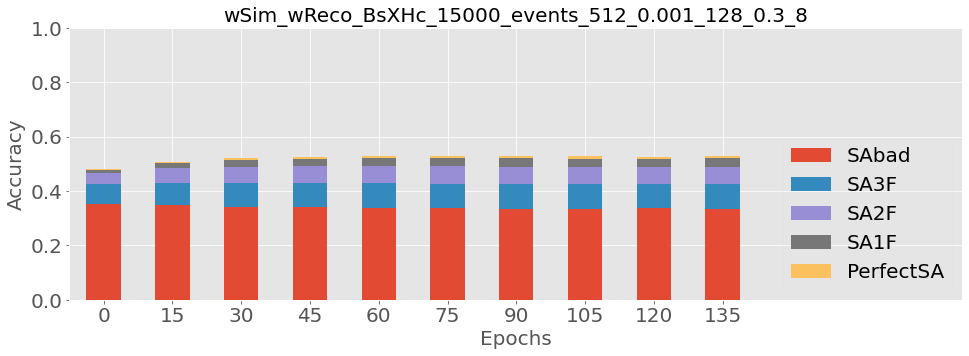

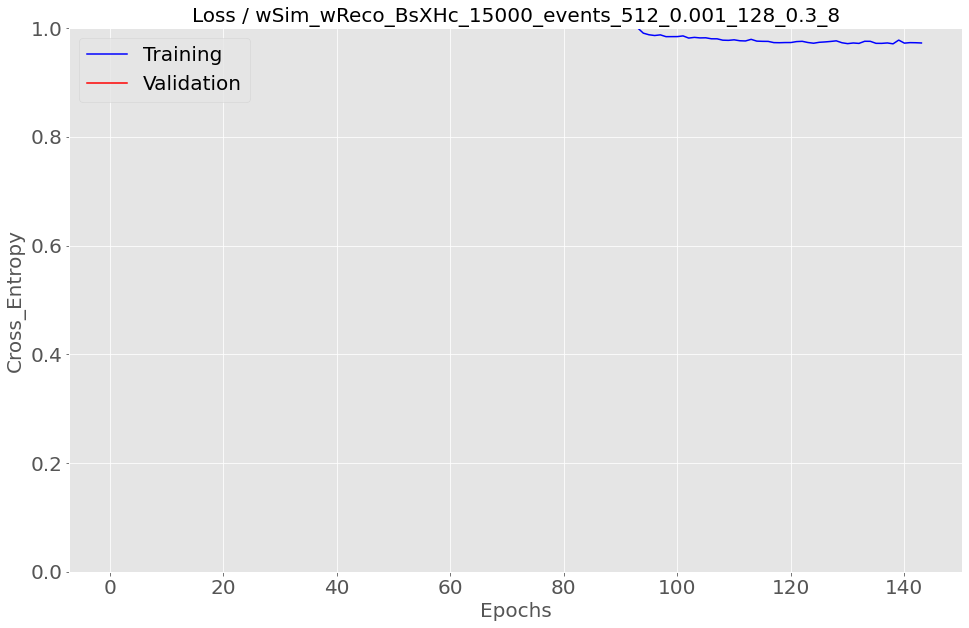

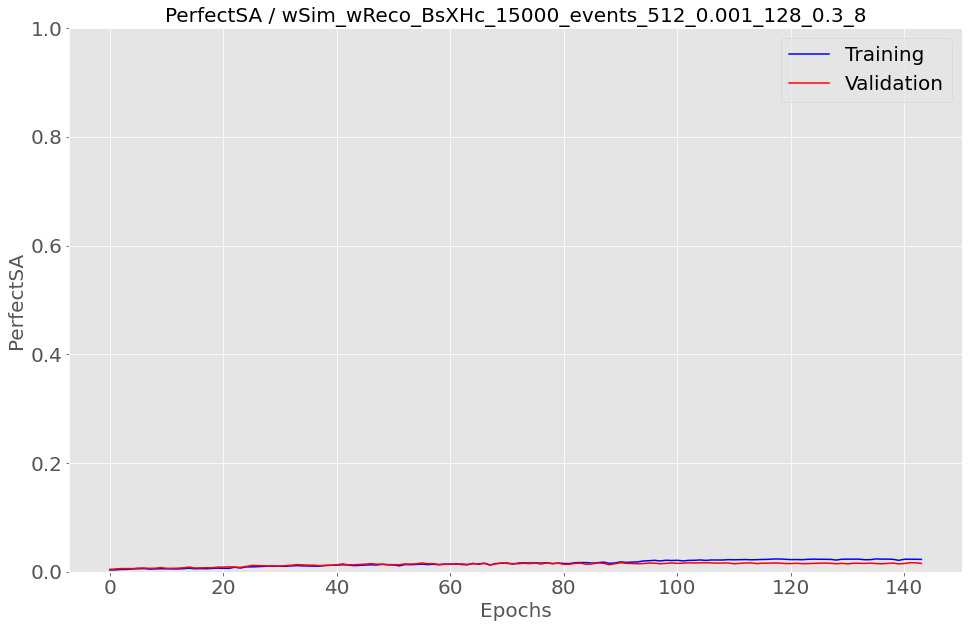

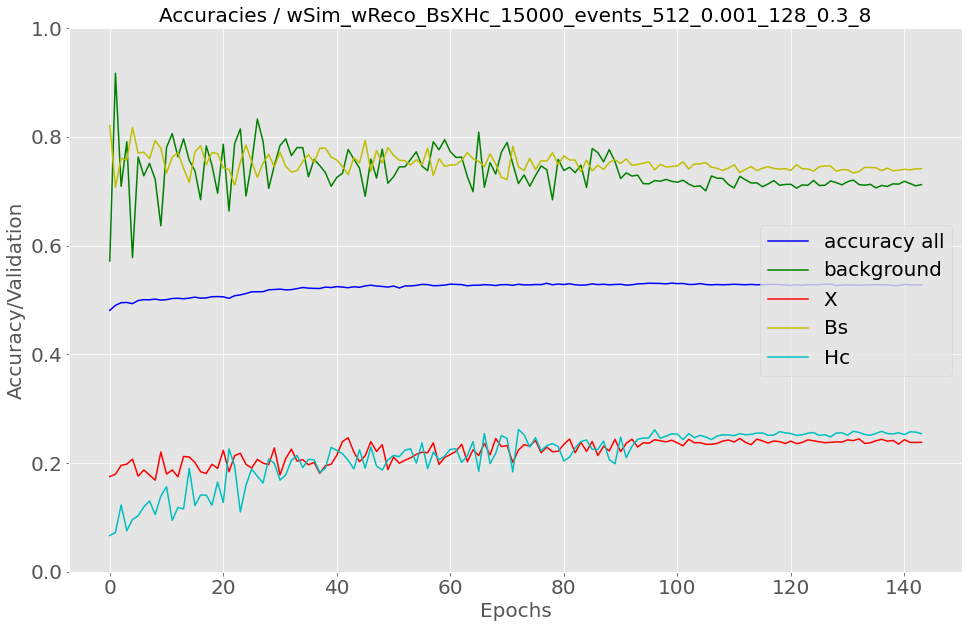

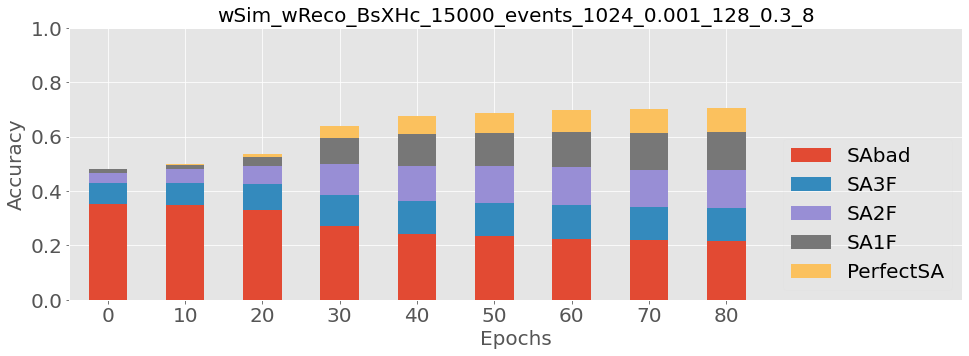

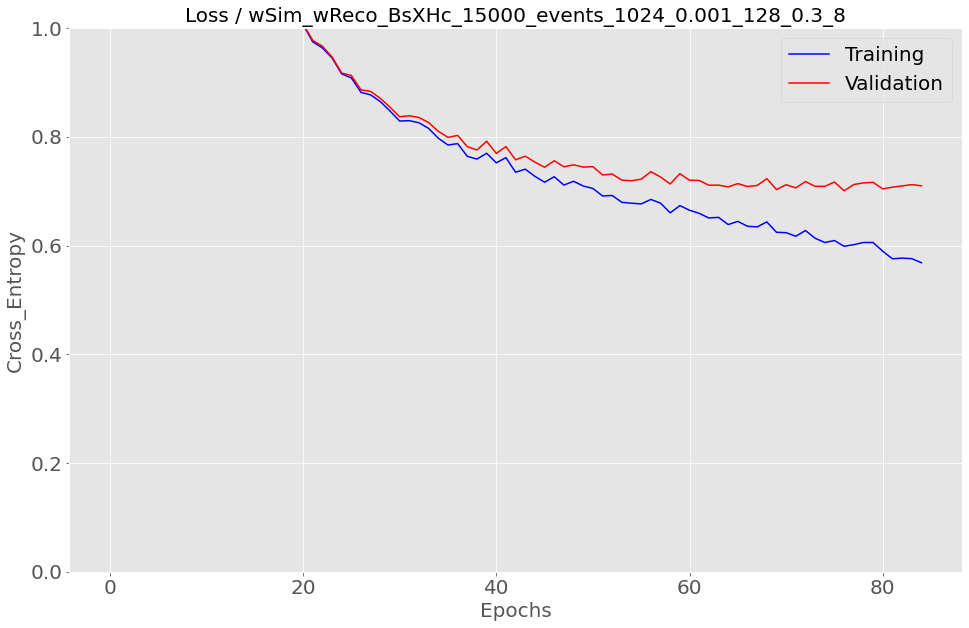

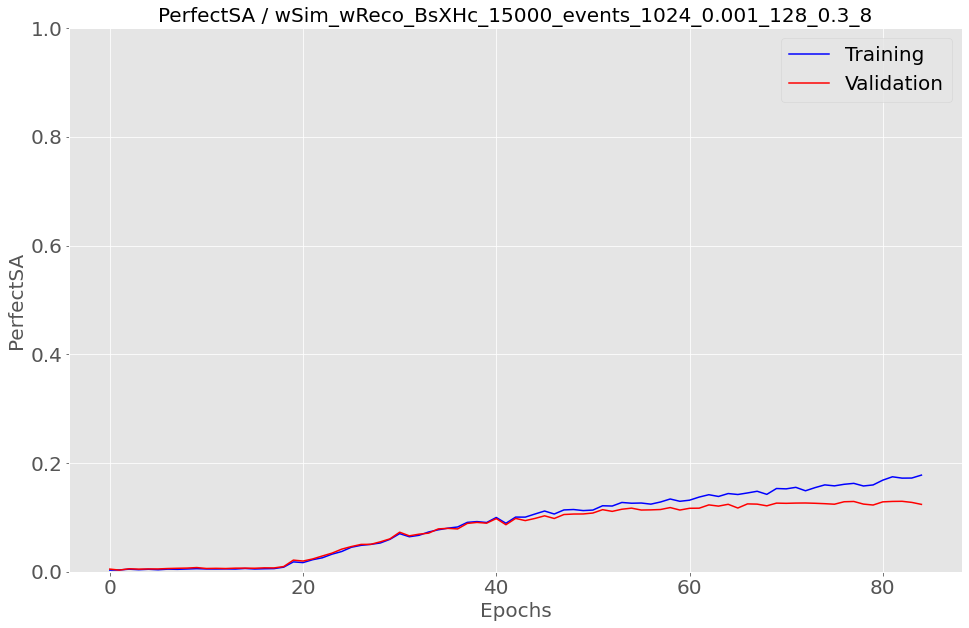

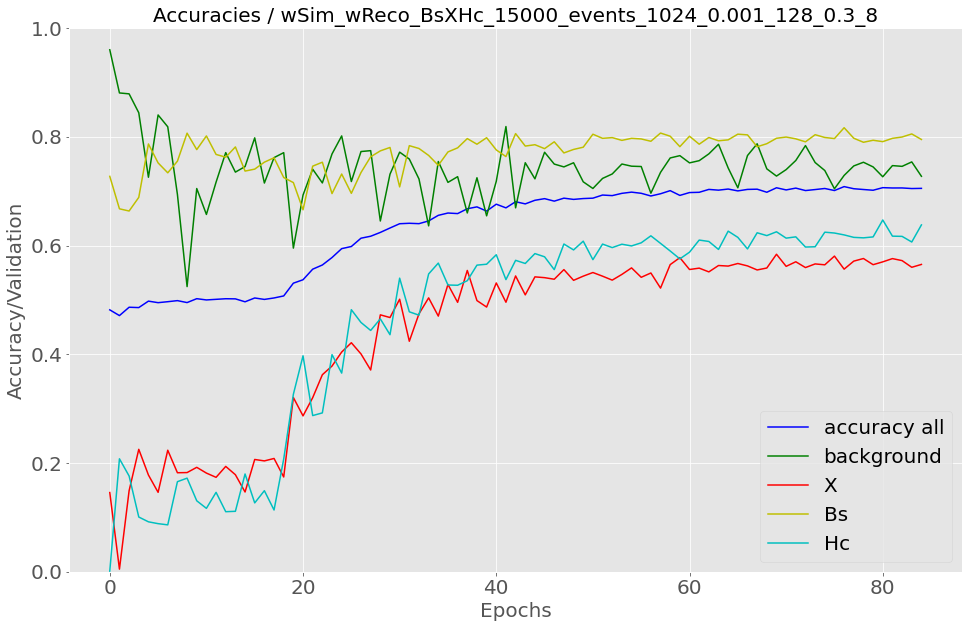

In [6]:
plotted_specs=[]
for data_name in data_names:
    for spec in specs:
        plotname_extension = data_name + '_' + spec
        nfs_path = "/nfs/dust/belle2/user/axelheim/MC_studies/my6modes/"

        plot_path = "/afs/desy.de/user/a/axelheim/private/MC_studies/my6modes/"
        
        
        data_dir = Path((nfs_path + 'tb_logs/' + data_name + '/' + spec))
        print("\n now processing:",data_dir)
        if not data_dir.is_dir():
            print("dir not found in: ", data_dir, "\n skip dir")
            continue
        
        
        csv_dir = Path((nfs_path + 'tb_csv/' + data_name + '/' + spec))
        csv_dir.mkdir(parents=True, exist_ok=True)

        plot_path = Path((plot_path + 'plots/' + data_name + '/' + spec))
        plot_path.mkdir(parents=True, exist_ok=True)

        tb_metrics = tabulate_metrics(data_dir, csv_dir)

        
        # choosing the tb_log with the most epochs recorded
        epochs = []
        for i in range(len(tb_metrics)):
            epochs.append(len(tb_metrics[i]))
            print("len(tb_metrics[i]):",len(tb_metrics[i]))
            
        most_epochs_idx = 0
        if len(tb_metrics) > 1:
            most_epochs_idx = epochs.index(max(epochs))
        
        print("most_epochs_idx:",most_epochs_idx)
        print("len(tb_metrics):",len(tb_metrics))
        if len(tb_metrics) < 1:
            continue
        longest_run = tb_metrics[most_epochs_idx]
        
        
        # the actual plots
        # bar plot
        steps = math.ceil(len(longest_run)/10)
        steps = int(math.ceil(steps / 5.0)) * 5
        multi_metric_bar_plot(longest_run, plot_path, ('barplot_metrics_' + plotname_extension), data_type="Validation", step=steps, metric_type="SA", title=plotname_extension)
        
        
        # loss plot
        loss_tr = longest_run['Cross Entropy/Training']
        loss_val = longest_run['Cross Entropy/Validation']
        curve_plot(loss_tr, loss_val, plot_path, ('loss_comparison_' + plotname_extension), 'Cross_Entropy', ('Loss / ' + plotname_extension))

        # perfect SA plot
        pLCA_tr = longest_run['PerfectSA/Training']
        pLCA_val = longest_run['PerfectSA/Validation']
        curve_plot(pLCA_tr, pLCA_val, plot_path, ('perfectSA_comparison_' + plotname_extension), 'PerfectSA', ('PerfectSA / ' + plotname_extension))
        
        # plot accuracies
        acc_all = longest_run["Accuracy/Validation"]
        acc_bg = longest_run["AccClass0/Validation"]
    
        # case BsXHc
        acc_X = longest_run["AccClass1/Validation"]
        acc_Bs = longest_run["AccClass2/Validation"]
        acc_Hc = longest_run["AccClass3/Validation"]
        
        print("type(acc_X):",type(acc_X))
        # case BsX
        if data_name.find("BsX") != -1 and data_name.find("Hc") == -1:
            acc_Hc = None
            
        # case XHc
        if data_name.find("XHc") != -1 and data_name.find("Bs") == -1:
            acc_Bs = None
            acc_Hc = longest_run["AccClass2/Validation"]  
            
        # case BsHc
        if data_name.find("BsHc") != -1:
            acc_X = None
            acc_Hc = longest_run["AccClass1/Validation"]
            
        
                
        
        curve_plot_accuracies(plot_path, ('accuracies_comparison_' + plotname_extension), 'Accuracy/Validation',
                              ('Accuracies / ' + plotname_extension),
                             acc_all=acc_all, acc_bg=acc_bg, acc_X=acc_X, acc_Bs=acc_Bs, acc_Hc=acc_Hc)
        
        
        plotted_specs.append(data_name + '///' + spec)
    



In [4]:
for i in range(len(plotted_specs)):
    print(plotted_specs[i])

wSim_wReco_BsHc_15000_events///512_0.001_128_0.3_8
wSim_wReco_XHc_15000_events///512_0.001_128_0.3_8
wSim_wReco_BsX_15000_events///1024_0.001_128_0.3_8
wSim_wReco_BsXHc_15000_events///512_0.001_128_0.3_8


In [5]:
x = None
type(type(x))

type

In [6]:
x == None

True

In [7]:
if x is None:
    print("none")

none


In [8]:
type(acc_Hc)

pandas.core.series.Series

In [9]:
isinstance(acc_Hc, pd.core.series.Series)

True